In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")
np.random.seed(42)


In [94]:
class Population():
    def __init__(self, bag, adjacency_mat):
        self.bag = bag
        self.parents = []
        self.score = 0
        self.best = None
        self.adjacency_mat = adjacency_mat


def init_population(cities, adjacency_mat, n_population):
    return Population(np.asarray([np.random.permutation(cities) for _ in range(n_population)]), adjacency_mat)


def fitness(self, chromosome):
    return sum([self.adjacency_mat[chromosome[i], chromosome[i + 1]] for i in range(len(chromosome)-1)])

Population.fitness = fitness


def evaluate(self):
    distances = np.asarray([self.fitness(chromosome) for chromosome in self.bag])
    self.score = np.min(distances)
    self.best = self.bag[distances.tolist().index(self.score)]
    self.parents.append(self.best)
    if False in (distances[0] == distances):
        distances = np.max(distances) - distances
    return distances / np.sum(distances)
    
Population.evaluate = evaluate


def select(self, k):
    fit = self.evaluate()
    while len(self.parents) < k:
        idx = np.random.randint(0, len(fit))
        if fit[idx] > np.random.rand():
            self.parents.append(self.bag[idx])
    self.parents = np.asarray(self.parents)

Population.select = select


def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (chromosome[b], chromosome[a])
    return chromosome

def crossover(self, p_cross):
    children = []
    count, size = self.parents.shape
    for _ in range(len(self.bag)):
        if np.random.rand() > p_cross:
            children.append(
                list(self.parents[np.random.randint(count, size=1)[0]])
            )
        else:
            parent1, parent2 = self.parents[
                np.random.randint(count, size=2), :
            ]
            idx = np.random.choice(range(size), size=2, replace=False)
            start, end = min(idx), max(idx)
            child = [None] * size
            for i in range(start, end + 1, 1):
                child[i] = parent1[i]
            pointer = 0
            for i in range(size):
                if child[i] is None:
                    while parent2[pointer] in child:
                        pointer += 1
                    child[i] = parent2[pointer]
            children.append(child)
    return children

Population.crossover = crossover


def mutate(self, p_cross, p_mut):
    next_bag = []
    children = self.crossover(p_cross)
    for child in children:
        if np.random.rand() < p_mut:
            next_bag.append(swap(child))
        else:
            next_bag.append(child)
    return next_bag
    
Population.mutate = mutate

def genetic_algorithm(cities, adjacency_mat, n_population, n_iter, selectivity=0.10, p_cross=0.5, p_mut=0.25, print_interval=100, return_history=False, verbose=False):
    pop = init_population(cities, adjacency_mat, n_population)
    best = pop.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        pop.select(n_population * selectivity)
        history.append(pop.score)
        if verbose:
            print(f"Generation {i}: {pop.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {pop.score}")
        if pop.score < score:
            best = pop.best
            score = pop.score
        children = pop.mutate(p_cross, p_mut)
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best

def make_mat(coordinates):
    res = [[get_distance(city1, city2) for city2 in coordinates] for city1 in coordinates]
    return np.asarray(res)

def get_distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)




C:\Users\fredr\AppData\Local\Temp\ipykernel_18464\3458573292.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('berlin52.tsp', skiprows = 6, delimiter=r'\s+', names = col_names, usecols=['x','y'], skipfooter=2) #! Seperates the columns by identifying the spaces


<class 'pandas.core.frame.DataFrame'>
Generation 0: 24729.711275632304
Generation 100: 13698.47014371833
Generation 200: 11030.815111579557
Generation 300: 9877.188686509493
Generation 400: 9382.1818928208
Generation 500: 9279.062041098694
Generation 600: 9142.35567189489
Generation 700: 9058.070347016357
Generation 800: 9057.790443381034
Generation 900: 8939.084521342986
Generation 1000: 8786.614028980379
Generation 1100: 8786.614028980379
Generation 1200: 8786.614028980379
Generation 1300: 8809.855384572216
Generation 1400: 8809.855384572216
Generation 1500: 8809.855384572216


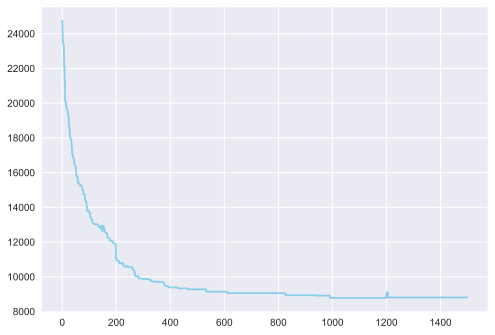

In [95]:
col_names = ['City Index', 'x', 'y']

df = pd.read_csv('berlin52.tsp', skiprows = 6, delimiter=r'\s+', names = col_names, usecols=['x','y'], skipfooter=2) #! Seperates the columns by identifying the spaces

print(type(df))

city_coordinates = df.to_numpy()

adjacency_mat = make_mat(city_coordinates)

cities = range(len(city_coordinates))

best, history = genetic_algorithm(cities, adjacency_mat, n_population=250, n_iter=1501, verbose=False, return_history=True)

plt.plot(range(len(history)), history, color="skyblue")
plt.show()


